In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import math 
from random import randrange
import pandas.util.testing as tm
import numpy  as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels import regression
from scipy import poly1d
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
import os
import pydotplus
import graphviz 
from random import randrange
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
-----------------------------------------------Kalzhigitov_Nurbol_ITSE-1908R----------------------------------------------------

In [ ]:
1st STEP --------------------------------------Take a first look at your data---------------------------------------------------

In [31]:
data = pd.read_csv('Lemonade_new.csv')

In [8]:
%matplotlib inline

In [32]:
data.head(10)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Season,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,Winter,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,Winter,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,Winter,4.5
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,Winter,5.1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,Winter,5.4
5,2017-01-06,Friday,25.3,1.54,23,0.3,11,Winter,3.3
6,2017-01-07,Saturday,32.9,1.54,19,0.3,13,Winter,3.9
7,2017-01-08,Sunday,37.5,1.18,28,0.3,15,Winter,4.5
8,2017-01-09,Monday,38.1,1.18,20,0.3,17,Winter,5.1
9,2017-01-10,Tuesday,43.4,1.05,33,0.3,18,Winter,5.4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
 7   Season       365 non-null    object 
 8   Revenue      365 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.4+ KB


In [9]:
data.describe()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.333973,25.323288,8.722466
std,16.196266,0.273171,13.178651,0.075206,6.893589,4.017536
min,15.100000,0.470000,9.000000,0.300000,7.000000,2.100000
25%,49.700000,0.650000,31.000000,0.300000,20.000000,6.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000,7.500000
75%,71.300000,0.910000,49.000000,0.300000,30.000000,9.300000
max,102.900000,2.500000,80.000000,0.500000,43.000000,21.500000


In [10]:
i = 0
j = 0
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'int64' or data.iloc[:, i].dtype == 'float64'):
  j += 1
 i += 1
print('numerical -', j)

numerical - 6


In [11]:
i = 0
j = 0
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'object'):
  j += 1
 i += 1
print('categorical -', j)

categorical - 3


In [12]:
i = 0
sum = 0
while i < data.shape[1]:  
 if (data[str(data.iloc[:, i].name)].isnull().any()):   
  print('column -',str(data.iloc[:, i].name),' - have:', data[str(data.iloc[:, i].name)].isnull().sum(), 'NaN Data')
 sum += data[str(data.iloc[:, i].name)].isna().sum()
 i += 1 
print('Total NaNs -', sum)

Total NaNs - 0


In [13]:
i = 0
sum = 0
while i < data.shape[1]:  
 if (data[str(data.iloc[:, i].name)].isnull().any()):   
  percent_missing = data[str(data.iloc[:, i].name)].isna().sum() * 100 / len(data)
  print('column -',str(data.iloc[:, i].name),' - have:', percent_missing, '%')
 i += 1
print(len(data))

365


In [15]:
data.shape

(365, 9)

<AxesSubplot:>

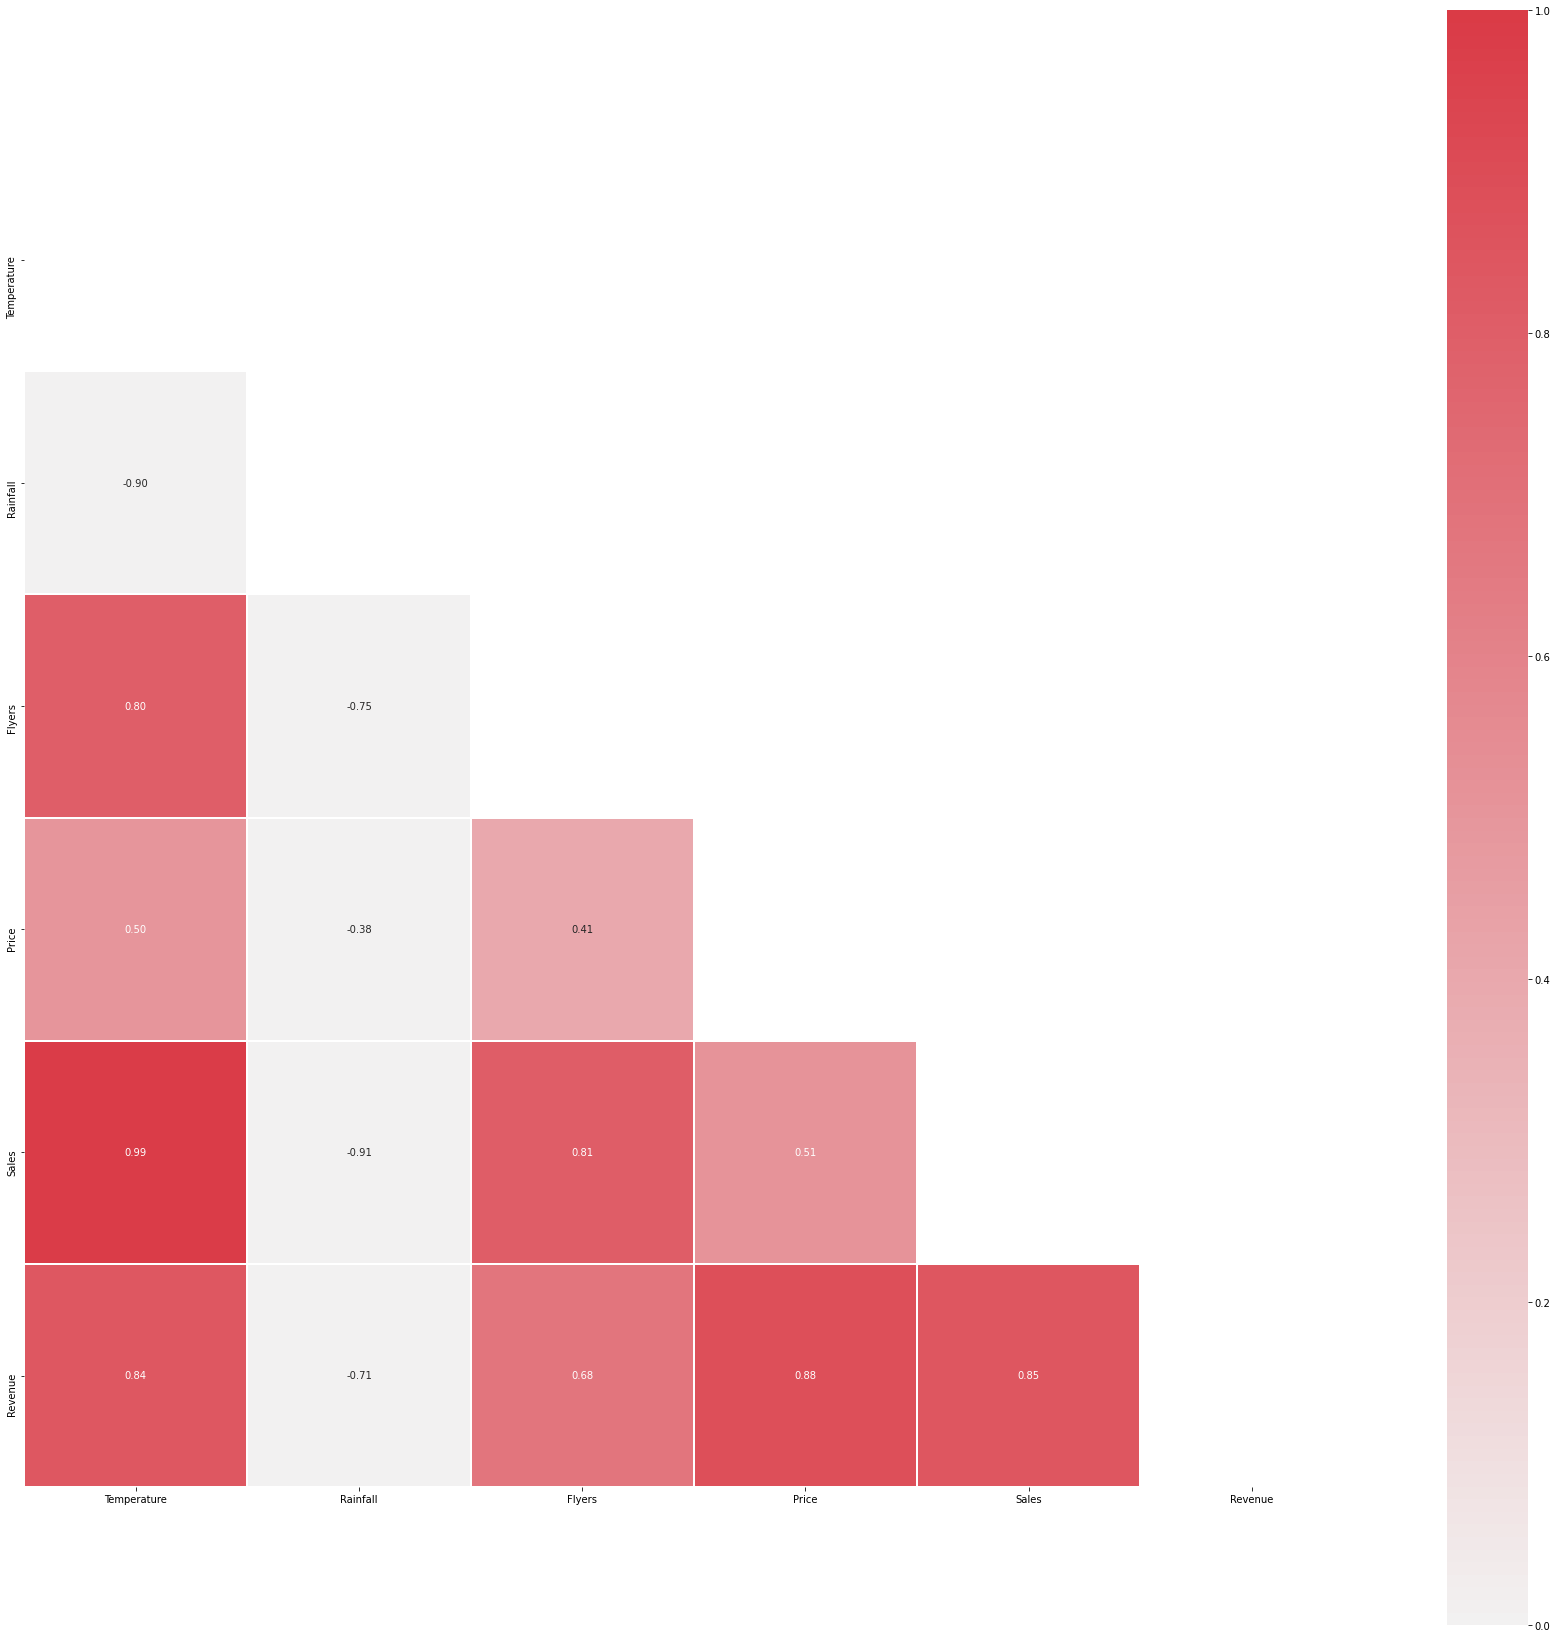

In [16]:
data_num = data.select_dtypes('number')
plt.figure(figsize=(30,30))
dataVisualSt = data_num .corr()
mask = np.triu(np.ones_like(dataVisualSt, dtype=bool))
cmap = sns.diverging_palette(110, 10, as_cmap=True)
sns.heatmap(dataVisualSt, annot=True, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0, fmt=".2f", square=True, linewidths=.99, cbar_kws={"shrink": .99})

In [ ]:
1st STEP ------------------------------------------Data prepatation-------------------------------------------------------------

In [ ]:
First of all we divided our data in two new data set, 
first primordial one that we use for our Dummy model and, 
second that we use in point 5 to improve our model.

In [ ]:
----------------------------------------------------Preparing a set-------------------------------------------------------------

In [98]:
df = pd.DataFrame()
i = 0
j = 0
while i < data.shape[1]: 
 if (data.iloc[:, i].dtype == 'int64' or data.iloc[:, i].dtype == 'float64'):
  df[str(dataImprove.iloc[:, i].name)] = data[str(dataImprove.iloc[:, i].name)]
 i += 1

In [99]:
df.head()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,27.0,2.00,15,0.3,10,3.0
1,28.9,1.33,15,0.3,13,3.9
2,34.5,1.33,27,0.3,15,4.5
3,44.1,1.05,28,0.3,17,5.1
4,42.4,1.00,33,0.3,18,5.4


In [17]:
dataImprove = data.copy()

In [18]:
dataImprove.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Season,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,Winter,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,Winter,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,Winter,4.5
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,Winter,5.1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,Winter,5.4


In [ ]:
----------------------------------------------------Restoring Nans Values-------------------------------------------------------

In [22]:
i = 0
while i < dataImprove.shape[1]: 
 if (dataImprove.iloc[:, i].dtype == 'int64' or dataImprove.iloc[:, i].dtype == 'float64'):
  data[str(dataImprove.iloc[:, i].name)].fillna(dataImprove[str(dataImprove.iloc[:, i].name)].median(), inplace=True)
 i += 1


In [23]:
dataImprove.head(10)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Season,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,Winter,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,Winter,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,Winter,4.5
3,2017-01-04,Wednesday,44.1,1.05,28,0.3,17,Winter,5.1
4,2017-01-05,Thursday,42.4,1.00,33,0.3,18,Winter,5.4
5,2017-01-06,Friday,25.3,1.54,23,0.3,11,Winter,3.3
6,2017-01-07,Saturday,32.9,1.54,19,0.3,13,Winter,3.9
7,2017-01-08,Sunday,37.5,1.18,28,0.3,15,Winter,4.5
8,2017-01-09,Monday,38.1,1.18,20,0.3,17,Winter,5.1
9,2017-01-10,Tuesday,43.4,1.05,33,0.3,18,Winter,5.4


In [ ]:
------------------------------------------------Converting Categorical Data-----------------------------------------------------

In [29]:
LabelEncoder_ = preprocessing.LabelEncoder()
i = 0
while i < dataImprove.shape[1]: 
 if (dataImprove.iloc[:, i].dtype == 'object'):
  dataImprove[str(dataImprove.iloc[:, i].name)] = LabelEncoder_.fit_transform(dataImprove[str(dataImprove.iloc[:, i].name)])
 i += 1

In [30]:
dataImprove.head(10)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Season,Revenue
0,0,3,27.0,2.00,15,0.3,10,3,3.0
1,1,1,28.9,1.33,15,0.3,13,3,3.9
2,2,5,34.5,1.33,27,0.3,15,3,4.5
3,3,6,44.1,1.05,28,0.3,17,3,5.1
4,4,4,42.4,1.00,33,0.3,18,3,5.4
5,5,0,25.3,1.54,23,0.3,11,3,3.3
6,6,2,32.9,1.54,19,0.3,13,3,3.9
7,7,3,37.5,1.18,28,0.3,15,3,4.5
8,8,1,38.1,1.18,20,0.3,17,3,5.1
9,9,5,43.4,1.05,33,0.3,18,3,5.4


In [ ]:
--------------------------------------------------Getting rid of outliers-------------------------------------------------------

In [ ]:
Before---

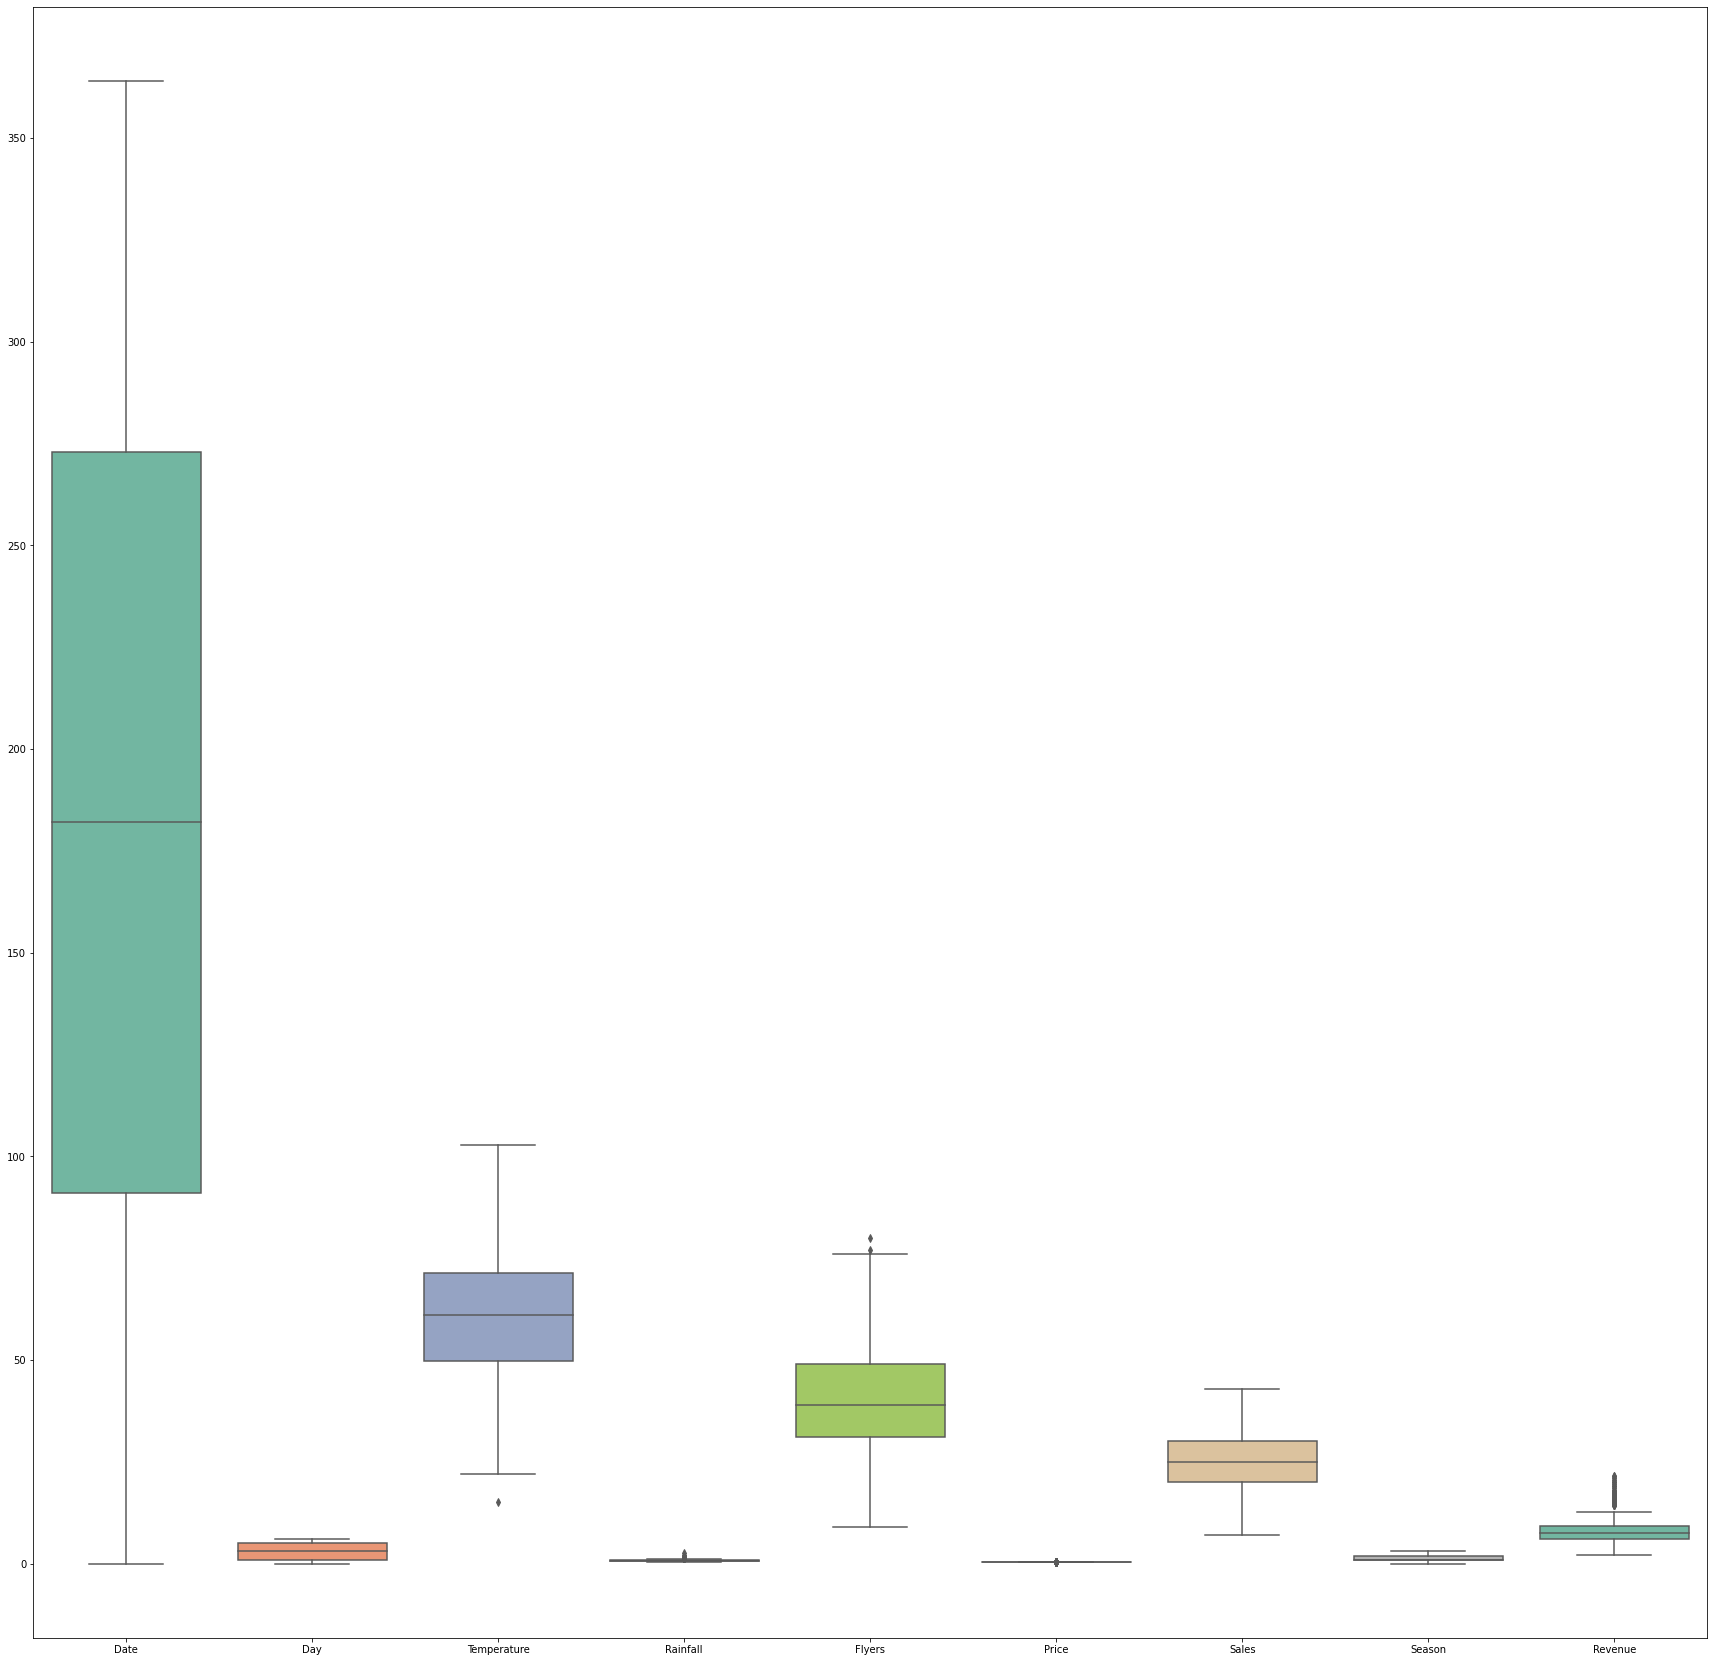

In [40]:
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=dataImprove, orient="T", palette="Set2")

In [ ]:
Fixing---

In [58]:
Q1 = dataImprove.quantile(0.25)
Q3 = dataImprove.quantile(0.75)
IQR = Q3 - Q1
i = 0
j = 0
k = 0
s = 0
while i < dataImprove.shape[1]:  
 if (dataImprove.iloc[:, i].dtype == 'int64' or dataImprove.iloc[:, i].dtype == 'float64'):
  dataTrueLess = dataImprove[str(dataImprove.iloc[:, i].name)] < (Q1[str(dataImprove.iloc[:, i].name)] - (1.5 * IQR[str(dataImprove.iloc[:, i].name)]))
  for k in dataTrueLess.index:
    if (dataTrueLess[k]): 
      dataImprove.drop(k, axis=0, inplace = True)
 i += 1 
while j < dataImprove.shape[1]:  
 if (dataImprove.iloc[:, j].dtype == 'int64' or dataImprove.iloc[:, j].dtype == 'float64'): 
  dataTrueMore = dataImprove[str(dataImprove.iloc[:, j].name)] > (Q3[str(dataImprove.iloc[:, j].name)] + (1.5 * IQR[str(dataImprove.iloc[:, j].name)]))
  for s in dataTrueMore.index:
    if (dataTrueMore[s]): 
      dataImprove.drop(s, axis=0, inplace = True)
 j += 1 

In [ ]:
After---

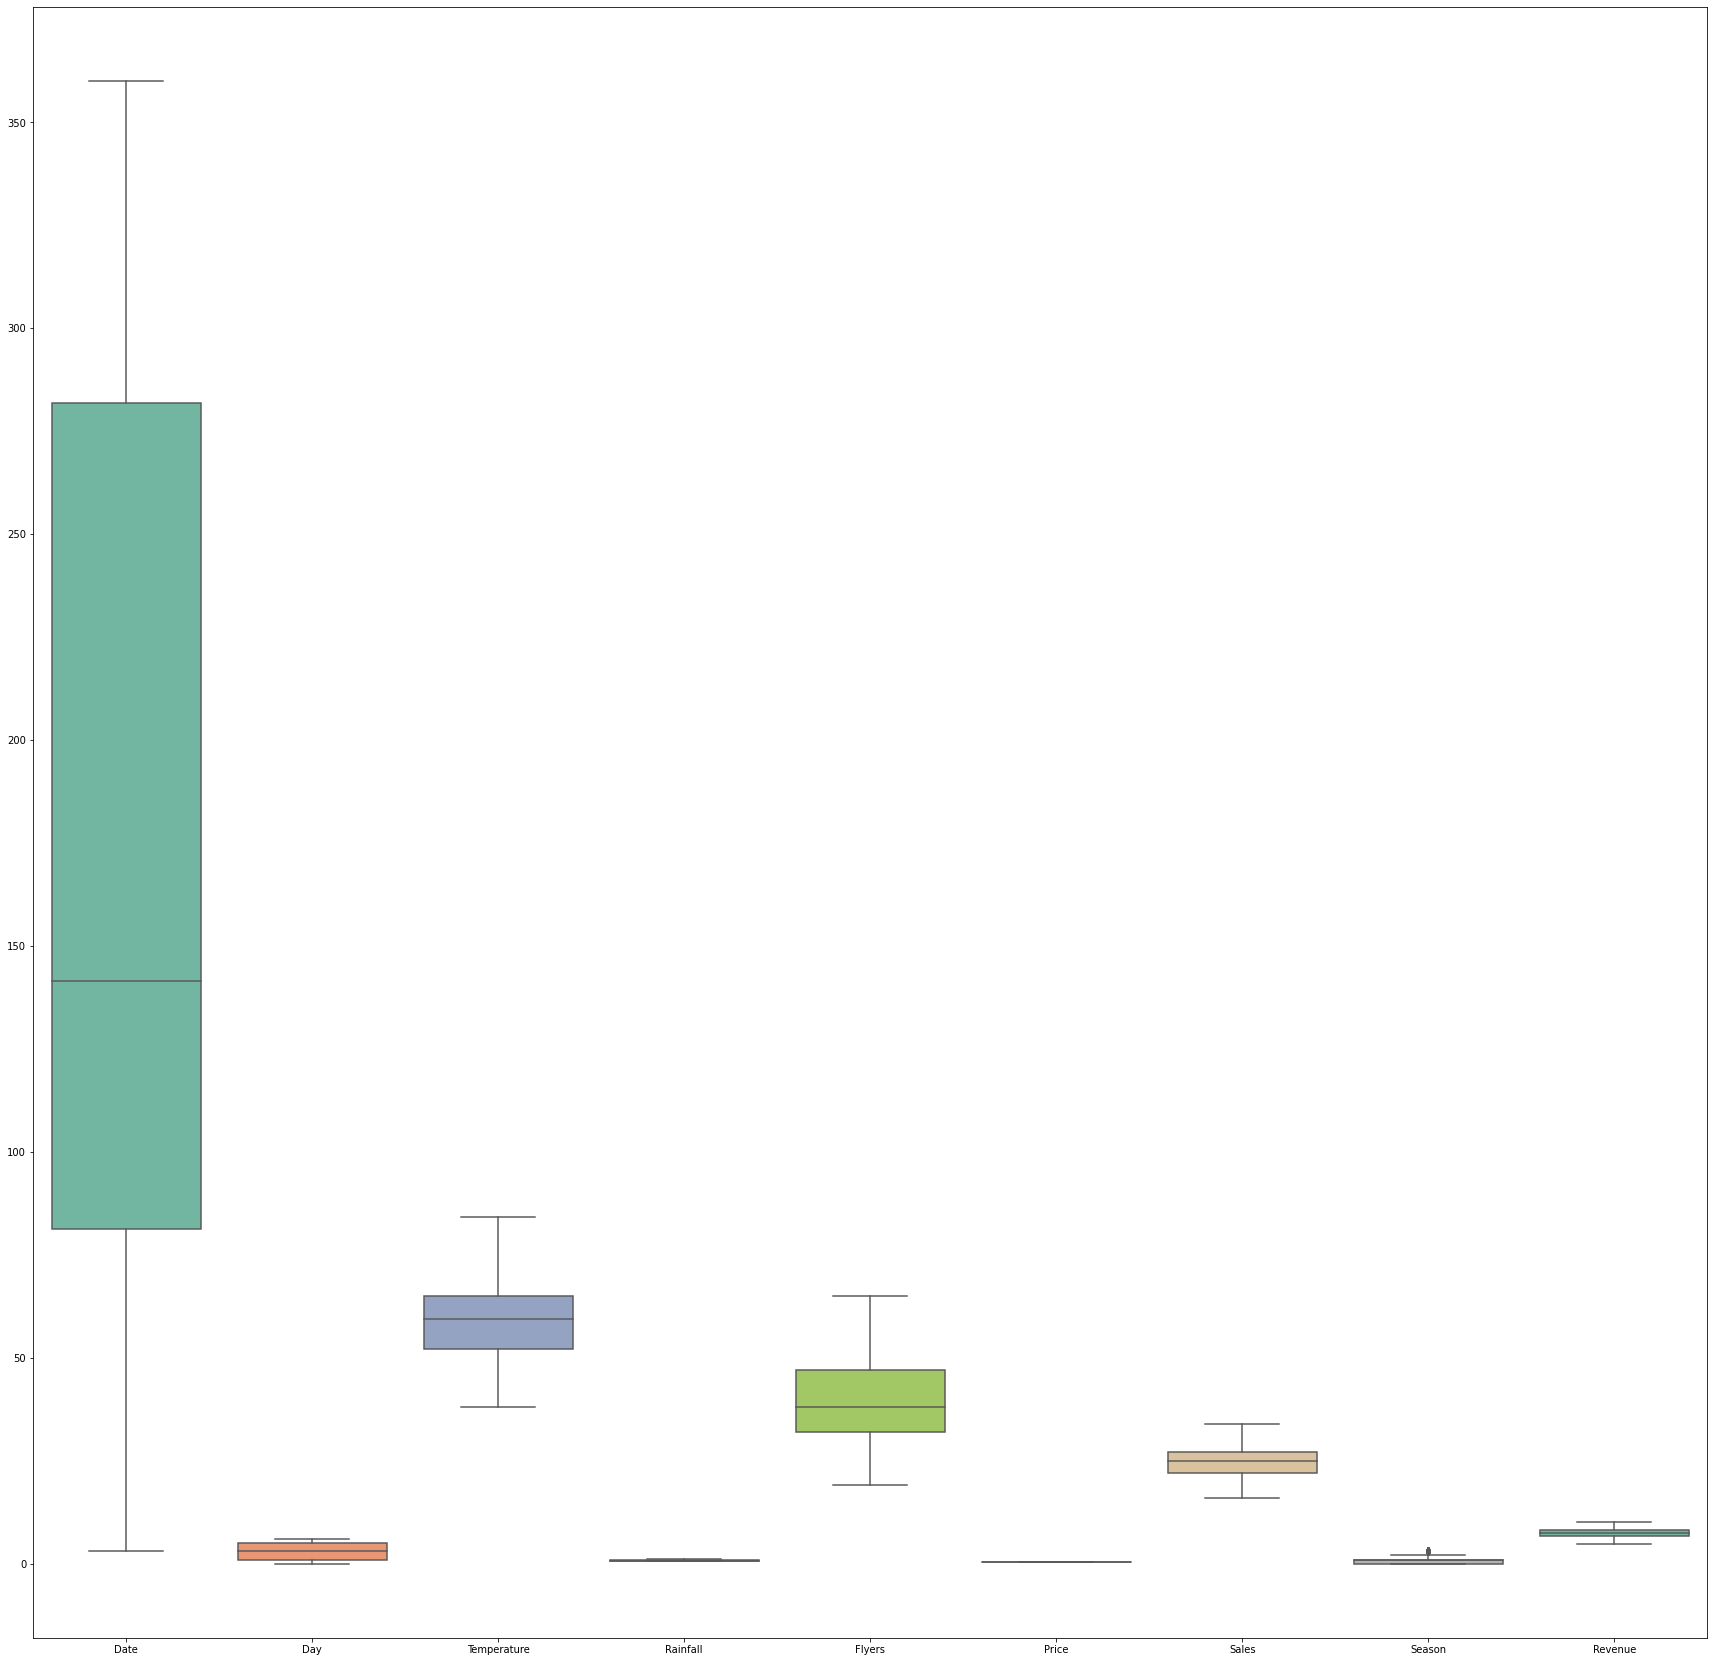

In [59]:
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=dataImprove, orient="T", palette="Set2")

In [69]:
dataImprove.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales',
       'Season', 'Revenue'],
      dtype='object')

In [ ]:
-----------------------------------------------Detecting features and target values---------------------------------------------

In [ ]:
1st set---

In [100]:
features = df.columns
features = features.tolist()
features.remove('Sales')
features = df[features]
features

,Temperature,Rainfall,Flyers,Price,Revenue
0,27.0,2.00,15,0.3,3.0
1,28.9,1.33,15,0.3,3.9
2,34.5,1.33,27,0.3,4.5
3,44.1,1.05,28,0.3,5.1
4,42.4,1.00,33,0.3,5.4
...,...,...,...,...,...
360,42.7,1.00,33,0.3,5.7
361,37.8,1.25,32,0.3,4.8
362,39.5,1.25,17,0.3,4.5
363,30.9,1.43,22,0.3,3.9


In [101]:
target = df.Sales
target

0      10
1      13
2      15
3      17
4      18
       ..
360    19
361    16
362    15
363    13
364     7
Name: Sales, Length: 365, dtype: int64

In [ ]:
2nd set---

In [72]:
featuresImprove = dataImprove.columns
featuresImprove = featuresImprove.tolist()
featuresImprove.remove('Sales')
featuresImprove = dataImprove[featuresImprove]
featuresImprove

,Date,Day,Temperature,Rainfall,Flyers,Price,Season,Revenue
3,3,6,44.1,1.05,28,0.3,3,5.1
4,4,4,42.4,1.00,33,0.3,3,5.4
9,9,5,43.4,1.05,33,0.3,3,5.4
13,13,2,44.1,1.05,23,0.3,3,5.1
14,14,3,43.4,1.11,33,0.3,3,5.4
...,...,...,...,...,...,...,...,...
344,344,1,45.1,1.11,33,0.3,3,5.1
348,348,0,42.1,1.05,30,0.3,3,5.1
352,352,5,41.4,1.00,33,0.3,3,5.4
356,356,2,42.4,1.11,20,0.3,3,5.4


In [73]:
targetImprove = dataImprove.Sales
targetImprove

3      17
4      18
9      18
13     17
14     18
       ..
344    17
348    17
352    18
356    18
360    19
Name: Sales, Length: 242, dtype: int64

In [ ]:
--------------------------------------------------------Train and Test----------------------------------------------------------

In [ ]:
1st------

In [102]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state= 30)

In [103]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((255, 5), (255,), (110, 5), (110,))

In [ ]:
2nd------

In [81]:
xImprove_train, xImprove_test, yImprove_train, yImprove_test = train_test_split(featuresImprove, targetImprove, test_size=0.3, random_state= 30)

In [82]:
xImprove_train.shape, yImprove_train.shape, xImprove_test.shape, yImprove_test.shape

((169, 8), (169,), (73, 8), (73,))

In [ ]:
3rd STEP ----------------------------------------Creating Dummy Model-----------------------------------------------------------

In [108]:
df.corr()

,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Temperature,1.000000,-0.902859,0.797719,0.504709,0.989832,0.839314
Rainfall,-0.902859,1.000000,-0.747389,-0.383775,-0.909214,-0.712513
Flyers,0.797719,-0.747389,1.000000,0.405437,0.805183,0.678700
Price,0.504709,-0.383775,0.405437,1.000000,0.512908,0.884179
Sales,0.989832,-0.909214,0.805183,0.512908,1.000000,0.849568
Revenue,0.839314,-0.712513,0.678700,0.884179,0.849568,1.000000


<AxesSubplot:xlabel='Temperature', ylabel='Sales'>

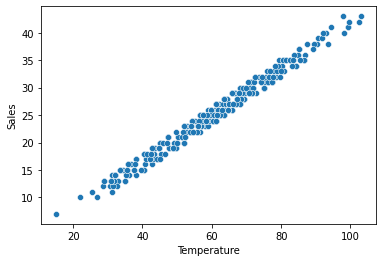

In [109]:
sns.scatterplot(x = df['Temperature'], y = df['Sales'])

In [83]:
Dummy_Model = LinearRegression()

In [104]:
Dummy_Model.fit(x_train, y_train)

LinearRegression()

In [106]:
y_predicted_dummy = Dummy_Model.predict(x_test)

In [107]:
metrics.r2_score(y_test, y_predicted_dummy)

0.9907113056540862

In [110]:
metrics.mean_squared_error(y_test, y_predicted_dummy)

0.3922968746196714

In [ ]:
-----------------------------------------------------Improving the model--------------------------------------------------------

In [ ]:
----2nd Data Set

In [111]:
Dummy_ModelImprove = LinearRegression()

In [112]:
Dummy_ModelImprove.fit(xImprove_train, yImprove_train)

LinearRegression()

In [113]:
yImprove_predicted_dummy = Dummy_ModelImprove.predict(xImprove_test)

In [114]:
metrics.r2_score(yImprove_test, yImprove_predicted_dummy)

1.0

In [ ]:
----Using Cross Validation Score

In [143]:
score = cross_val_score(Dummy_ModelImprove, featuresImprove, targetImprove, cv = 10)

In [134]:
score.mean()

1.0

In [ ]:
----Normalization

In [136]:
DataNormalize = preprocessing.normalize(dataImprove)

In [138]:
DataNormalize = pd.DataFrame(DataNormalize, columns = dataImprove.columns)

In [139]:
DataNormalize.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Season,Revenue
0,0.053890,0.107780,0.792186,0.018862,0.502975,0.005389,0.305378,0.053890,0.091613
1,0.069822,0.069822,0.740109,0.017455,0.576029,0.005237,0.314197,0.052366,0.094259
2,0.153406,0.085226,0.739758,0.017897,0.562489,0.005114,0.306812,0.051135,0.092044
3,0.238461,0.036686,0.808934,0.019260,0.421893,0.005503,0.311834,0.055030,0.093550
4,0.235268,0.050415,0.729330,0.018653,0.554560,0.005041,0.302487,0.050415,0.090746


In [140]:
featuresN = DataNormalize.columns
featuresN = featuresN.tolist()
featuresN.remove('Sales')
featuresN = DataNormalize[featuresN]
featuresN

,Date,Day,Temperature,Rainfall,Flyers,Price,Season,Revenue
0,0.053890,0.107780,0.792186,0.018862,0.502975,0.005389,0.053890,0.091613
1,0.069822,0.069822,0.740109,0.017455,0.576029,0.005237,0.052366,0.094259
2,0.153406,0.085226,0.739758,0.017897,0.562489,0.005114,0.051135,0.092044
3,0.238461,0.036686,0.808934,0.019260,0.421893,0.005503,0.055030,0.093550
4,0.235268,0.050415,0.729330,0.018653,0.554560,0.005041,0.050415,0.090746
...,...,...,...,...,...,...,...,...
237,0.985737,0.002866,0.129235,0.003181,0.094562,0.000860,0.008597,0.014614
238,0.987849,0.000000,0.119507,0.002981,0.085159,0.000852,0.008516,0.014477
239,0.987366,0.014025,0.116128,0.002805,0.092566,0.000842,0.008415,0.015147
240,0.990031,0.005562,0.117914,0.003087,0.055620,0.000834,0.008343,0.015017


In [141]:
targetN = DataNormalize.Sales
targetN

0      0.305378
1      0.314197
2      0.306812
3      0.311834
4      0.302487
         ...   
237    0.048714
238    0.048257
239    0.050490
240    0.050058
241    0.052108
Name: Sales, Length: 242, dtype: float64

In [145]:
scoreN = cross_val_score(Dummy_ModelImprove, featuresN, targetN, cv = 10)

In [146]:
scoreN.mean()

1.0

In [ ]:
----Polynominal Features

In [238]:
poly = preprocessing.PolynomialFeatures(2)

In [239]:
square_poly_matrix = poly.fit_transform(featuresImprove)

In [242]:
square_poly_matrix

array([[  1.  ,   3.  ,   6.  , ...,   9.  ,  15.3 ,  26.01],
       [  1.  ,   4.  ,   4.  , ...,   9.  ,  16.2 ,  29.16],
       [  1.  ,   9.  ,   5.  , ...,   9.  ,  16.2 ,  29.16],
       ...,
       [  1.  , 352.  ,   5.  , ...,   9.  ,  16.2 ,  29.16],
       [  1.  , 356.  ,   2.  , ...,   9.  ,  16.2 ,  29.16],
       [  1.  , 360.  ,   6.  , ...,   9.  ,  17.1 ,  32.49]])

In [258]:
square_poly_matrix.shape

(242, 45)

In [257]:
Poly_DataFrame = pd.DataFrame(square_poly_matrix)

In [259]:
Poly_DataFrame.drop(Poly_DataFrame.columns[0], axis=1, inplace = True) #Dropping Irrelivant feature.

In [260]:
Poly_DataFrame

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,3.0,6.0,44.1,1.05,28.0,0.3,3.0,5.1,9.0,18.0,...,784.0,8.4,84.0,142.8,0.09,0.9,1.53,9.0,15.3,26.01
1,4.0,4.0,42.4,1.00,33.0,0.3,3.0,5.4,16.0,16.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
2,9.0,5.0,43.4,1.05,33.0,0.3,3.0,5.4,81.0,45.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
3,13.0,2.0,44.1,1.05,23.0,0.3,3.0,5.1,169.0,26.0,...,529.0,6.9,69.0,117.3,0.09,0.9,1.53,9.0,15.3,26.01
4,14.0,3.0,43.4,1.11,33.0,0.3,3.0,5.4,196.0,42.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,344.0,1.0,45.1,1.11,33.0,0.3,3.0,5.1,118336.0,344.0,...,1089.0,9.9,99.0,168.3,0.09,0.9,1.53,9.0,15.3,26.01
238,348.0,0.0,42.1,1.05,30.0,0.3,3.0,5.1,121104.0,0.0,...,900.0,9.0,90.0,153.0,0.09,0.9,1.53,9.0,15.3,26.01
239,352.0,5.0,41.4,1.00,33.0,0.3,3.0,5.4,123904.0,1760.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
240,356.0,2.0,42.4,1.11,20.0,0.3,3.0,5.4,126736.0,712.0,...,400.0,6.0,60.0,108.0,0.09,0.9,1.62,9.0,16.2,29.16


In [261]:
Poly_DataFrame['targetN'] = targetN

In [262]:
Poly_DataFrame

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,targetN
0,3.0,6.0,44.1,1.05,28.0,0.3,3.0,5.1,9.0,18.0,...,8.4,84.0,142.8,0.09,0.9,1.53,9.0,15.3,26.01,0.305378
1,4.0,4.0,42.4,1.00,33.0,0.3,3.0,5.4,16.0,16.0,...,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16,0.314197
2,9.0,5.0,43.4,1.05,33.0,0.3,3.0,5.4,81.0,45.0,...,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16,0.306812
3,13.0,2.0,44.1,1.05,23.0,0.3,3.0,5.1,169.0,26.0,...,6.9,69.0,117.3,0.09,0.9,1.53,9.0,15.3,26.01,0.311834
4,14.0,3.0,43.4,1.11,33.0,0.3,3.0,5.4,196.0,42.0,...,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16,0.302487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,344.0,1.0,45.1,1.11,33.0,0.3,3.0,5.1,118336.0,344.0,...,9.9,99.0,168.3,0.09,0.9,1.53,9.0,15.3,26.01,0.048714
238,348.0,0.0,42.1,1.05,30.0,0.3,3.0,5.1,121104.0,0.0,...,9.0,90.0,153.0,0.09,0.9,1.53,9.0,15.3,26.01,0.048257
239,352.0,5.0,41.4,1.00,33.0,0.3,3.0,5.4,123904.0,1760.0,...,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16,0.050490
240,356.0,2.0,42.4,1.11,20.0,0.3,3.0,5.4,126736.0,712.0,...,6.0,60.0,108.0,0.09,0.9,1.62,9.0,16.2,29.16,0.050058


In [263]:
featuresPoly = Poly_DataFrame.columns
featuresPoly = featuresPoly.tolist()
featuresPoly.remove('targetN')
featuresPoly = Poly_DataFrame[featuresPoly]
featuresPoly

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,3.0,6.0,44.1,1.05,28.0,0.3,3.0,5.1,9.0,18.0,...,784.0,8.4,84.0,142.8,0.09,0.9,1.53,9.0,15.3,26.01
1,4.0,4.0,42.4,1.00,33.0,0.3,3.0,5.4,16.0,16.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
2,9.0,5.0,43.4,1.05,33.0,0.3,3.0,5.4,81.0,45.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
3,13.0,2.0,44.1,1.05,23.0,0.3,3.0,5.1,169.0,26.0,...,529.0,6.9,69.0,117.3,0.09,0.9,1.53,9.0,15.3,26.01
4,14.0,3.0,43.4,1.11,33.0,0.3,3.0,5.4,196.0,42.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,344.0,1.0,45.1,1.11,33.0,0.3,3.0,5.1,118336.0,344.0,...,1089.0,9.9,99.0,168.3,0.09,0.9,1.53,9.0,15.3,26.01
238,348.0,0.0,42.1,1.05,30.0,0.3,3.0,5.1,121104.0,0.0,...,900.0,9.0,90.0,153.0,0.09,0.9,1.53,9.0,15.3,26.01
239,352.0,5.0,41.4,1.00,33.0,0.3,3.0,5.4,123904.0,1760.0,...,1089.0,9.9,99.0,178.2,0.09,0.9,1.62,9.0,16.2,29.16
240,356.0,2.0,42.4,1.11,20.0,0.3,3.0,5.4,126736.0,712.0,...,400.0,6.0,60.0,108.0,0.09,0.9,1.62,9.0,16.2,29.16


In [264]:
targetPoly = Poly_DataFrame.targetN
targetPoly

0      0.305378
1      0.314197
2      0.306812
3      0.311834
4      0.302487
         ...   
237    0.048714
238    0.048257
239    0.050490
240    0.050058
241    0.052108
Name: targetN, Length: 242, dtype: float64

In [267]:
scorePoly = cross_val_score(Dummy_ModelImprove, featuresPoly, targetPoly, cv = 5)

In [268]:
scorePoly

array([  0.82809395,   0.95999369,   0.84227172,   0.85828465,
       -15.56521302])

In [ ]:
--------------------------------------------------------Summary-----------------------------------------------------------------